In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import pylab
import numpy as np
import skimage.io as io
import random
import json 
import sys
import itertools
import collections

In [2]:
plt.rcParams.update({'font.size': 8})

In [3]:
def load_json(file):
    print(file)
    with open(file) as json_file:  
        data = json.load(json_file)
        #for p in data['annotations']:
            #print(p["image_id"])

        return data

In [4]:
def samples_without_keypoints(data):
    samples = 0
    for s in data['annotations']:
        if s['num_keypoints'] == 0:
            samples = samples + 1
    return samples

In [5]:
def samples_that_contain_full_skeletons(data):
    samples = 0
    for s in data['annotations']:
        if s['num_keypoints'] == 16:
            samples = samples + 1
    return samples

In [6]:
#histograms
#histograma care arata numarul de scheleti completi in functie de aria sa
#intervals- numarul de intervale pentru care intervalul de arie este selectat si numarul de scheleti completi pentru 
#acel interval este selectat.

def area_histogram(data, intervals, file):
    #create data
    min_area = sys.float_info.max
    max_area = 0.0
    for s in data["annotations"]:
        if s["area"] < min_area:
            min_area = s["area"]
        if s["area"] > max_area:
            max_area = s["area"] 

    interval_area = (max_area - min_area) / intervals

    histogram = dict()
    for i in range(intervals):
        #calculate 
        min_interval = min_area + i * interval_area
        max_interval = min_area + (i+1) * interval_area
        histogram[str(int(min_interval))+"_"+str(int(max_interval))] = 0
        for s in data["annotations"]:
            if s["num_keypoints"] == 16:
                if s["area"] > min_interval and s["area"] < max_interval:
                    histogram[str(int(min_interval))+"_"+str(int(max_interval))] = histogram[str(int(min_interval))+"_"+str(int(max_interval))] + 1

    plt.title("area_histogram " + file)
    plt.bar(list(histogram.keys()), histogram.values(), color='b')
    plt.show()

In [7]:
#histograma care arata numarul de scheleti in functie de numarul sau de keypointuri valabile. 

def skeletons_histogram(data, file):
    histogram = dict()
    for i in range(0, 16, 1):
        histogram[i] = 0
        for s in data["annotations"]:
            if s["num_keypoints"] == i:
                histogram[i] = histogram[i] + 1
    plt.title("skeletons_histogram " + file)
    plt.bar(list(histogram.keys()), histogram.values(), color='b')
    plt.show()

In [8]:
#probabilitatea ca un keypoint sa apara in dataset.

def probabilty_keypoints(data, file):
    
    histogram = {key:0 for key in range(0,17,1)}
    cases = len(data["annotations"])
    for s in data["annotations"]:
        t = 0
        for k in range(0,len(s["keypoints"]),3):
            if s["keypoints"][k] != 0:
                histogram[t] = histogram[t] + 1
            t = t + 1

    labels = [
            "nose","left_eye","right_eye","left_ear","right_ear",\
            "left_shoulder","right_shoulder","left_elbow","right_elbow",\
            "left_wrist","right_wrist","left_hip","right_hip",\
            "left_knee","right_knee","left_ankle","right_ankle"\
        ]
    for l in range(17):
        histogram[labels[l]] = histogram.pop(l)
        histogram[labels[l]] = histogram[labels[l]]/cases 

    plt.title("probabilty_keypoints" + file)
    plt.bar(list(histogram.keys()), histogram.values(), color='b')
    plt.show()  

In [9]:
# histograma pentru numarul de sample-uri in functie de numarul de persoane din ele. 
def get_crowd_statistics(data, file):

    crowds_ids = [s["image_id"] for s in data["annotations"]]

    crowds_images ={item:count for item, count in collections.Counter(crowds_ids).items() if count >= 1}
    
    count_images  = crowds_images.values()

    crowds_images = {item:count for item, count in collections.Counter(count_images).items() if count >= 1}

    return crowds_images

In [10]:
if __name__ == "__main__":
    
    dataDir = './COCO'
    dataFiles = ["train2014","train2017",\
        "val2014","val2017"]

    
    

In [11]:
    d = dataFiles[0]
    annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,d)
    json_object = load_json(annFile)
    print("Samples that contain keypoints in "+d+": " + str(len(json_object["annotations"]) - samples_without_keypoints(json_object)))
    print("Samples that contain full skeletons in "+d+": " + str(samples_that_contain_full_skeletons(json_object)))

./COCO/annotations/person_keypoints_train2014.json
Samples that contain keypoints in train2014: 105968
Samples that contain full skeletons in train2014: 11077


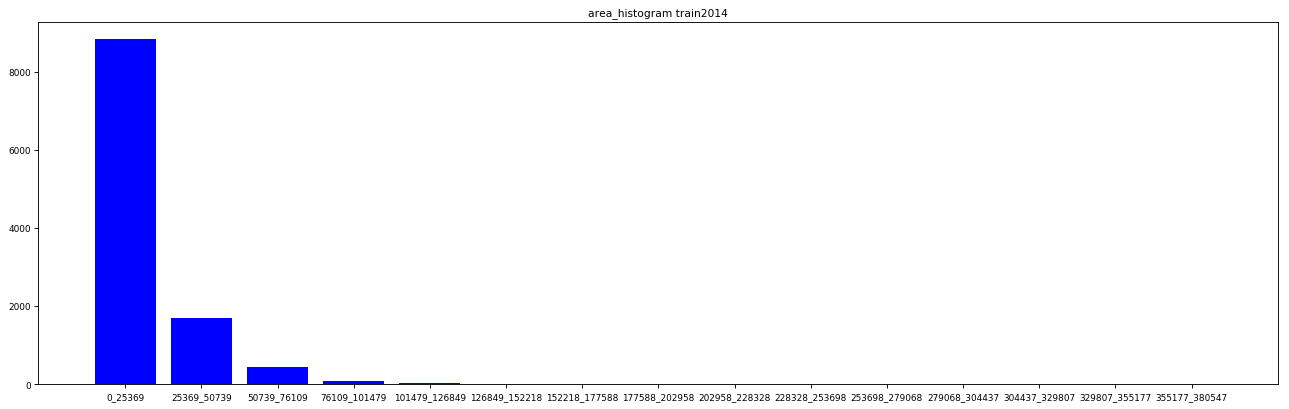

<Figure size 432x288 with 0 Axes>

In [12]:
    fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
    area_histogram(json_object,15,d)
    plt.clf()

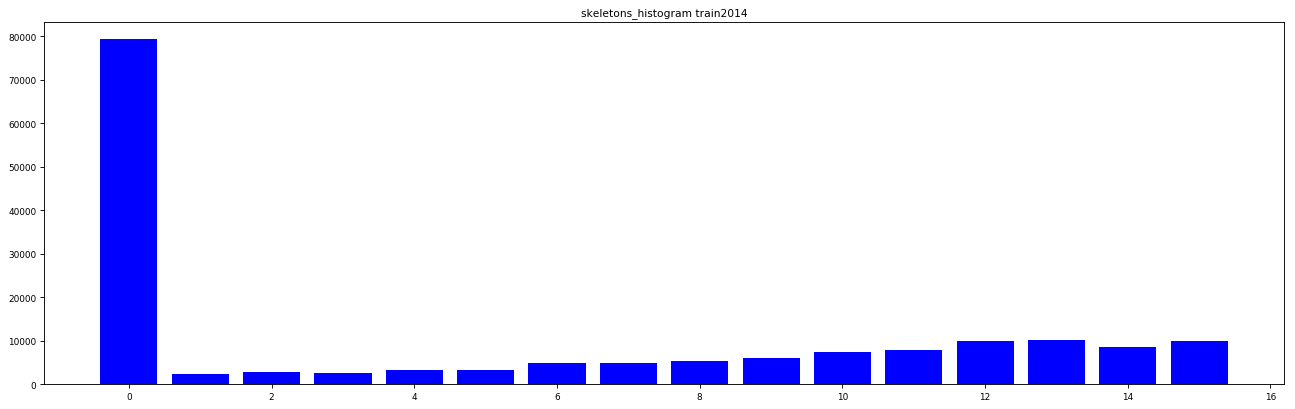

<Figure size 432x288 with 0 Axes>

In [14]:
    fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
    skeletons_histogram(json_object,d)
    plt.clf()

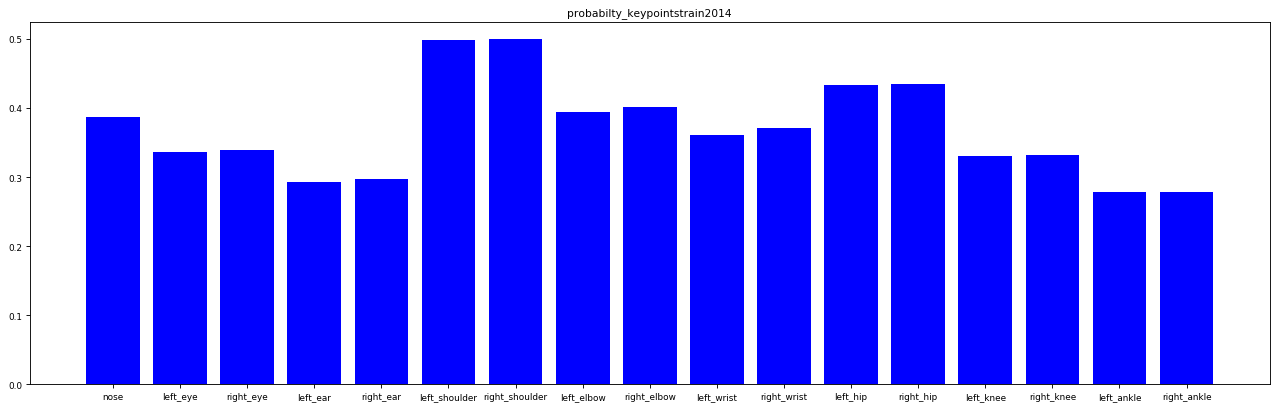

<Figure size 432x288 with 0 Axes>

In [15]:
    fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
    probabilty_keypoints(json_object, d)
    plt.clf()

In [16]:
    d = dataFiles[1]
    annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,d)
    json_object = load_json(annFile)
    print("Samples that contain keypoints in "+d+": " + str(len(json_object["annotations"]) - samples_without_keypoints(json_object)))
    print("Samples that contain full skeletons in "+d+": " + str(samples_that_contain_full_skeletons(json_object)))

./COCO/annotations/person_keypoints_train2017.json
Samples that contain keypoints in train2017: 149813
Samples that contain full skeletons in train2017: 15648


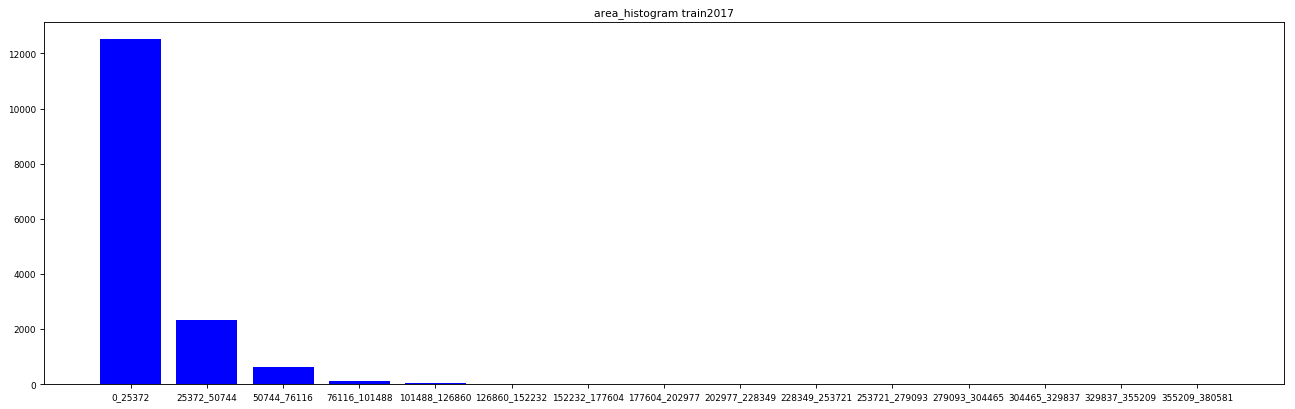

<Figure size 432x288 with 0 Axes>

In [17]:
    fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
    area_histogram(json_object,15,d)
    plt.clf()

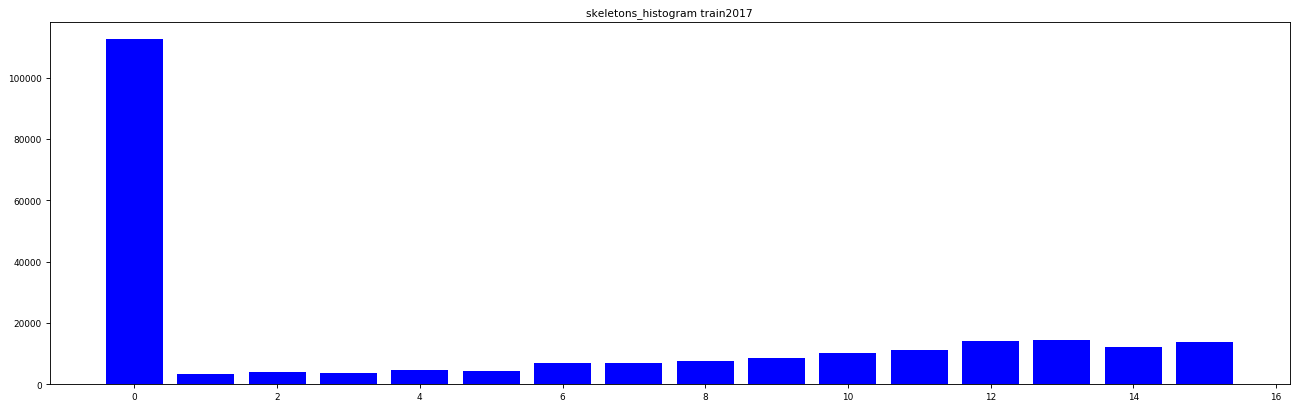

<Figure size 432x288 with 0 Axes>

In [18]:
    fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
    skeletons_histogram(json_object,d)
    plt.clf()

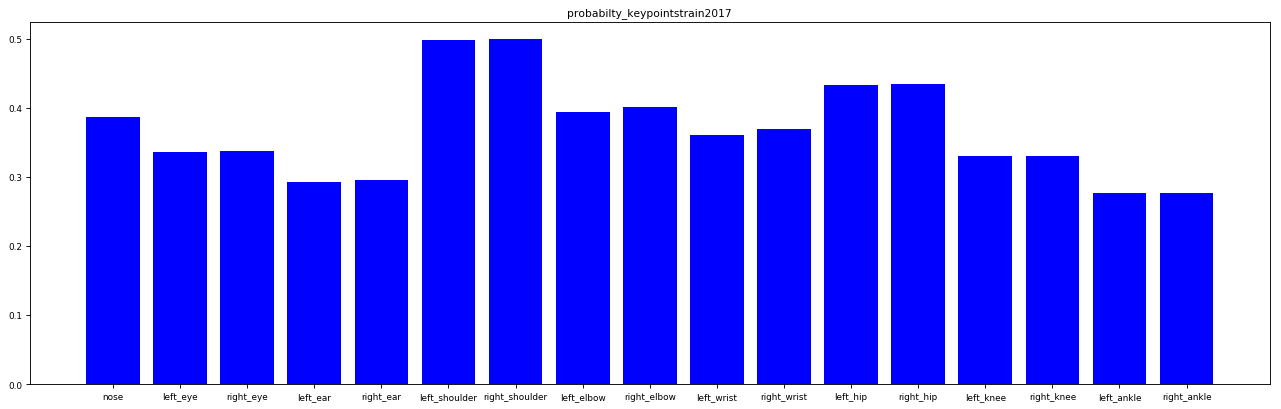

<Figure size 432x288 with 0 Axes>

In [19]:
    fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
    probabilty_keypoints(json_object, d)
    plt.clf()

In [20]:
    d = dataFiles[2]
    annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,d)
    json_object = load_json(annFile)
    print("Samples that contain keypoints in "+d+": " + str(len(json_object["annotations"]) - samples_without_keypoints(json_object)))
    print("Samples that contain full skeletons in "+d+": " + str(samples_that_contain_full_skeletons(json_object)))

./COCO/annotations/person_keypoints_val2014.json
Samples that contain keypoints in val2014: 50197
Samples that contain full skeletons in val2014: 5145


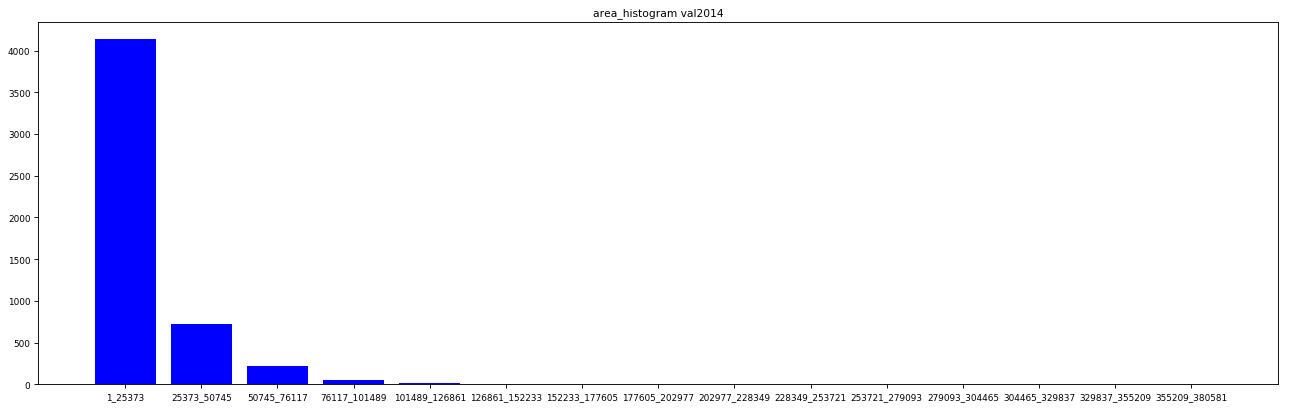

<Figure size 432x288 with 0 Axes>

In [22]:
    fig=plt.figure(figsize=(20, 6) ,dpi= 80, facecolor='w', edgecolor='k')
    area_histogram(json_object,15,d)
    plt.clf()

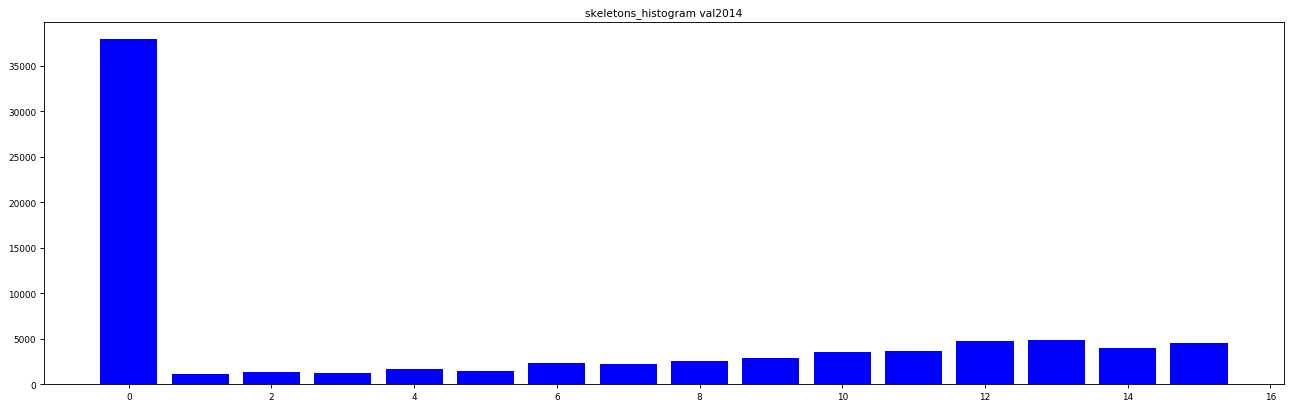

<Figure size 432x288 with 0 Axes>

In [23]:
    fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
    skeletons_histogram(json_object,d)
    plt.clf()

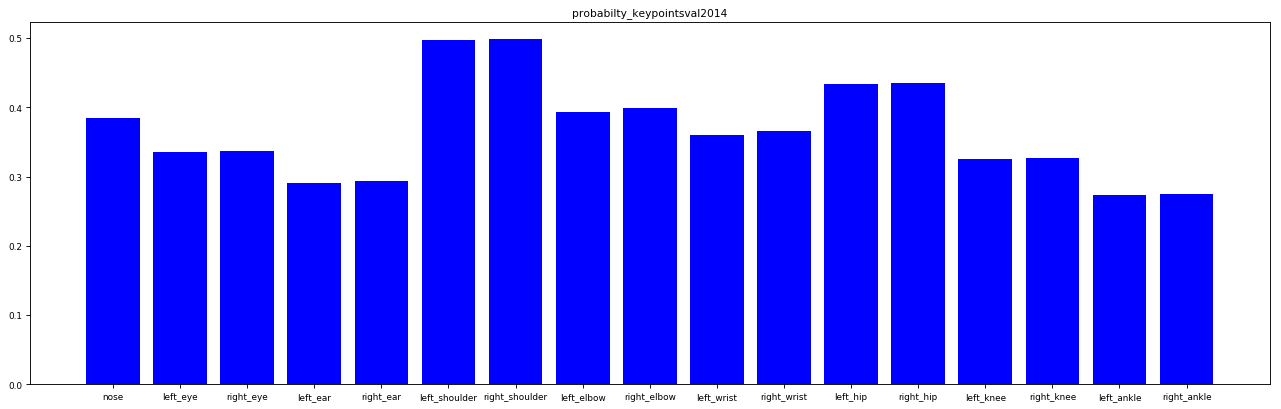

<Figure size 432x288 with 0 Axes>

In [24]:
    fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
    probabilty_keypoints(json_object, d)
    plt.clf()

In [25]:
    d = dataFiles[3]
    annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,d)
    json_object = load_json(annFile)
    print("Samples that contain keypoints in "+d+": " + str(len(json_object["annotations"]) - samples_without_keypoints(json_object)))
    print("Samples that contain full skeletons in "+d+": " + str(samples_that_contain_full_skeletons(json_object))) 

./COCO/annotations/person_keypoints_val2017.json
Samples that contain keypoints in val2017: 6352
Samples that contain full skeletons in val2017: 574


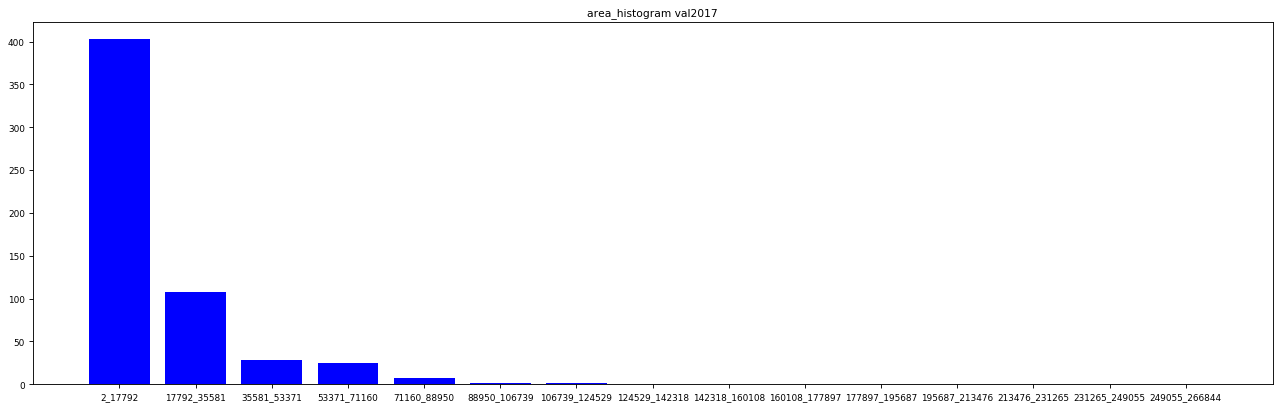

<Figure size 432x288 with 0 Axes>

In [26]:
    fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
    area_histogram(json_object,15,d)
    plt.clf()

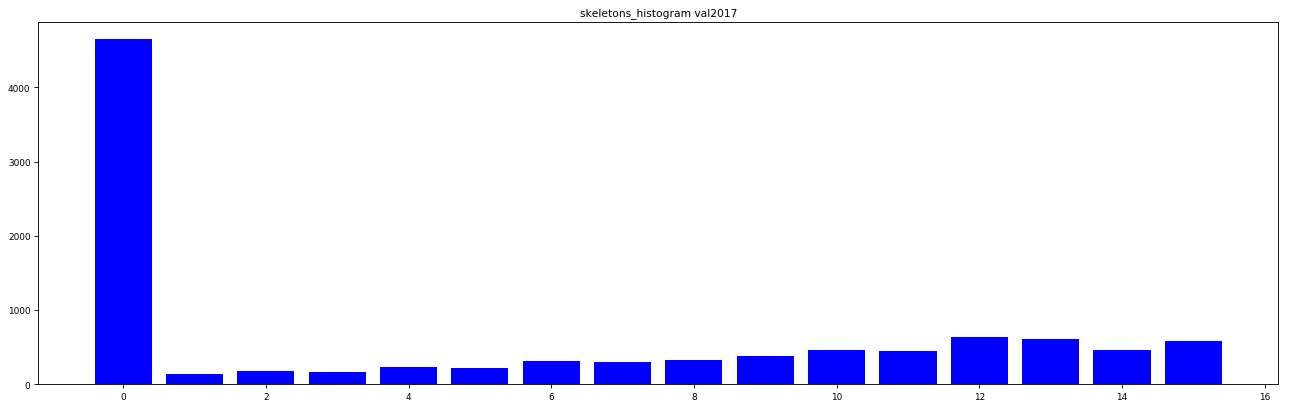

<Figure size 432x288 with 0 Axes>

In [27]:
    fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
    skeletons_histogram(json_object,d)
    plt.clf()

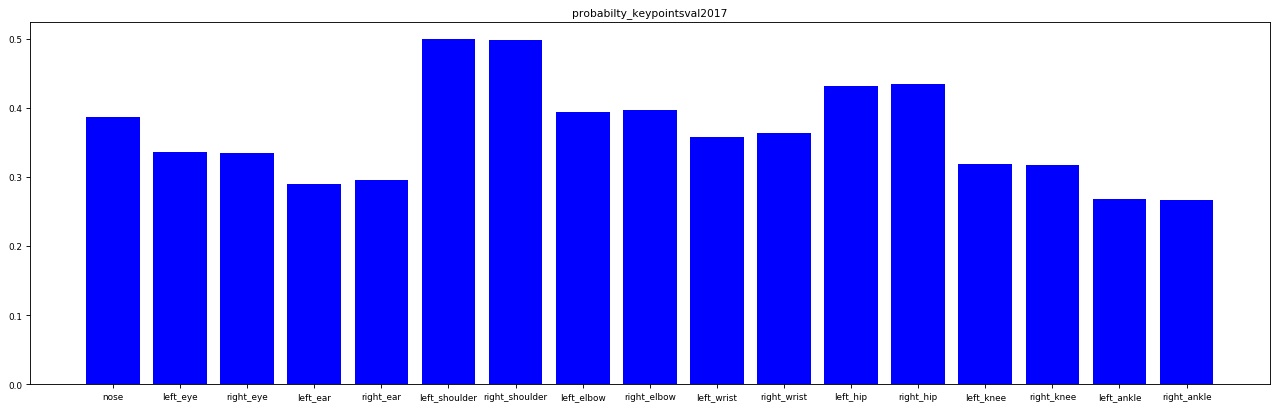

<Figure size 432x288 with 0 Axes>

In [28]:
    fig=plt.figure(figsize=(20, 6), dpi= 80, facecolor='w', edgecolor='k')
    probabilty_keypoints(json_object, d)
    plt.clf()

./COCO/annotations/person_keypoints_train2014.json
./COCO/annotations/person_keypoints_train2017.json
./COCO/annotations/person_keypoints_val2014.json
./COCO/annotations/person_keypoints_val2017.json
[{2: 7663, 1: 17293, 6: 1450, 8: 1027, 10: 869, 5: 1959, 11: 865, 3: 4192, 7: 1193, 13: 956, 14: 3268, 4: 2757, 12: 815, 9: 858, 15: 6, 16: 1, 18: 1, 20: 1}, {1: 24832, 3: 5889, 2: 10730, 4: 3889, 9: 1238, 5: 2726, 13: 1323, 7: 1691, 14: 4705, 6: 2104, 12: 1137, 8: 1411, 10: 1198, 11: 1226, 15: 12, 16: 2, 18: 1, 20: 1}, {1: 8584, 3: 1965, 2: 3503, 4: 1280, 9: 440, 5: 886, 13: 414, 7: 565, 14: 1647, 6: 764, 12: 360, 10: 393, 8: 421, 11: 405, 15: 6, 16: 1}, {1: 1045, 2: 436, 7: 67, 3: 268, 14: 210, 10: 64, 12: 38, 6: 110, 4: 148, 5: 119, 13: 47, 11: 44, 8: 37, 9: 60}]


<Figure size 432x288 with 0 Axes>

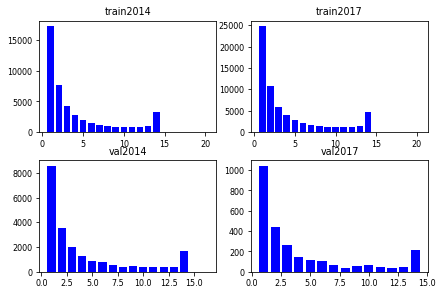

In [29]:
    histograms = []
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    fig, ax = plt.subplots(nrows=2, ncols=2)
    fig.tight_layout()
    for d in dataFiles:
        annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,d)
        json_object = load_json(annFile)
        histograms.append(get_crowd_statistics(json_object,d))
    print(histograms)
    t=0
    for row in ax:
        for col in row:
            col.bar(list(histograms[t].keys()), histograms[t].values(), color='b')
            col.set_title(dataFiles[t])
            t = t + 1
            